<pre>
Name: Ritika Sarkar
Reg.No: 19BAI1031
Slot: L3 + L4
Code: CSE1015
Faculty: Dr. G. Suganya
Data: 15.03.21
</pre>

Link to Dataset: https://www.kaggle.com/itsmesunil/bank-loan-modelling

<h3>Naive Bayes Classification</h3>

In [77]:
import pandas as pd
import seaborn as sns

In [78]:
import os
path ="archive"
df1 = pd.read_excel(
     os.path.join(path, "Bank_Personal_Loan_Modelling.xlsx"),
     engine='openpyxl',
    sheet_name="Data"
)

<pre>
Data Description:								
								
ID	Customer ID							
Age	Customer's age in completed years							
Experience	#years of professional experience							
Income	Annual income of the customer ($000)							
ZIPCode	Home Address ZIP code.							
Family	Family size of the customer							
CCAvg	Avg. spending on credit cards per month ($000)							
Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
Mortgage	Value of house mortgage if any. ($000)							
Personal Loan	Did this customer accept the personal loan offered in the last campaign?							
Securities Account	Does the customer have a securities account with the bank?							
CD Account	Does the customer have a certificate of deposit (CD) account with the bank?							
Online	Does the customer use internet banking facilities?							
CreditCard	Does the customer use a credit card issued by UniversalBank?							

</pre>

<h5>Data Analysis</h5>

In [79]:
df1.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

Here, Target Column: Personal Loan

In [80]:
df1.shape

(5000, 14)

In [95]:
df1.isnull().sum()

Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [81]:
df1.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937913     1.881000    56.498800       0.096000   
std       1.147663     1.747666     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

NOTE: We see that ID and Zip Code are not needed, and Experience has a negative value which gives error in fit method. So we'll drop these columns

<h5>Checking if collinearity exists</h5>

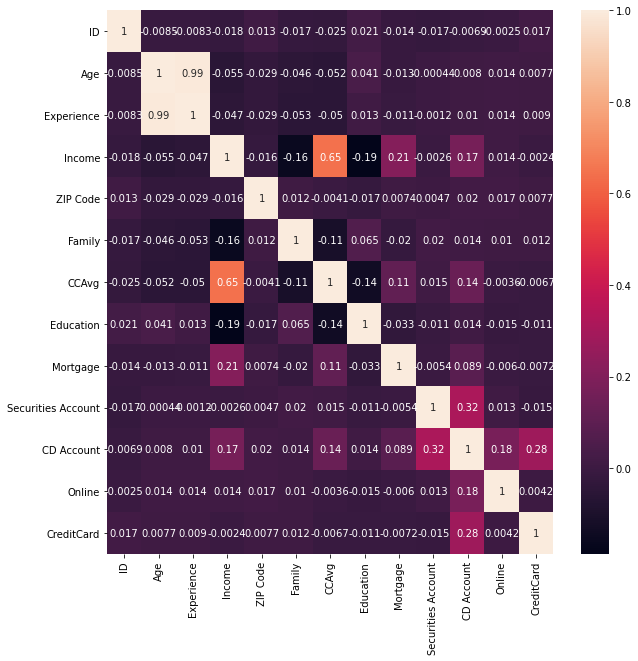

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df1.drop(['Personal Loan'],axis=1).corr(), annot=True)

NOTE: Experience and Age have very high positive correlation. So it is required to drop these columns

NOTE 2: Other values of correlation are low and hence we can proceed with Naive Bayes Classification

In [83]:
df1.drop(['ID','ZIP Code','Experience'],axis=1,inplace=True)

<h5>Splitting the dataset into training and testing sets</h5> 

In [84]:
import numpy as np
from sklearn.model_selection import train_test_split
x= df1.drop(['Personal Loan'],axis=1)
y= df1['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(x.index, y, test_size=0.3, random_state=0)
print(y_train.shape, y_test.shape)

(3500,) (1500,)


In [85]:
x.iloc[x_train].shape
x_train = x.iloc[x_train]

In [86]:
x.iloc[x_test].shape
x_test = x.iloc[x_test]
x_test

Age  Income  Family     CCAvg  Education  Mortgage  Securities Account  \
398    54      23       2  0.400000          1         0                   0   
3833   33      83       1  0.100000          1         0                   0   
4836   54      72       3  1.400000          3       218                   0   
4572   32      81       4  1.800000          3         0                   0   
636    40     120       2  6.100000          1       196                   0   
...   ...     ...     ...       ...        ...       ...                 ...   
4554   41     109       3  1.000000          1         0                   1   
4807   40      53       1  2.000000          1         0                   0   
1073   33     122       1  0.000000          1         0                   0   
2906   35      55       2  1.666667          2         0                   0   
1357   55      53       1  1.400000          1         0                   0   

      CD Account  Online  CreditCard  
398            0       0           0  
3833           0       1           0  
4836           0       0           1  
4572           0       1           0  
636            0       1           0  
...          ...     ...         ...  
4554           0       1           0  
4807           0       1           1  
1073           0       1           1  
2906           0       1           0  
1357           0       0           0  

[1500 rows x 10 columns]

<h5>Modelling</h5>

In [87]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(x_train, y_train)

CategoricalNB()

<h5>Prediction on test set</h5>

In [102]:
y_pred = cnb.predict(x_test)

In [103]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<h5>Checking accuracy</h5>

In [104]:
print(x_test.shape[0])
print(y_test!=y_pred)

1500
398     False
3833    False
4836    False
4572    False
636     False
        ...  
4554    False
4807    False
1073    False
2906    False
1357    False
Name: Personal Loan, Length: 1500, dtype: bool


In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix 
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test,y_pred))

Accuracy:  0.94
Confusion matrix: 
[[1350   22]
 [  68   60]]


Hence accuracy of the Naive Bayes model is 94%